In [34]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [9]:
l = ['a','b','c','d']
ser = pd.Series(l,name='L',index=[1,2,3,4])
print(ser)

1    a
2    b
3    c
4    d
Name: L, dtype: object


In [11]:
d = {'a':22,'b':23,'c':24,'d':100}
ser = pd.Series(d,name='D')
print(ser)

a     22
b     23
c     24
d    100
Name: D, dtype: int64


In [19]:
copy = pd.read_csv('movie.csv')
print(copy)

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
4911  Color        Scott Smith                     1.0      87.0   
4912  Color                NaN                    43.0      43.0   
4913  Color   Benjamin Roberds                    13.0      76.0   
4914  Color        Daniel Hsia                    14.0     100.0   
4915  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0    

In [22]:
dic = {'A':[1,2,3,4],
      'B':[1,2,3,4],
      'C':[1,2,3,4],
      'D':[1,2,3,4]}
copy1 = pd.DataFrame(dic)
print(copy1)
copy1.set_index(['A', 'B', 'C'],inplace=True)
print(copy1)
print(list(dic.keys()))

   A  B  C  D
0  1  1  1  1
1  2  2  2  2
2  3  3  3  3
3  4  4  4  4
       D
A B C   
1 1 1  1
2 2 2  2
3 3 3  3
4 4 4  4
['A', 'B', 'C', 'D']


In [5]:
directors = copy['director_name']
directors

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [6]:
d1 = {'A':[]}
df1 = pd.DataFrame(d1)
print(df1)

Empty DataFrame
Columns: [A]
Index: []


In [21]:
data = pd.DataFrame([[1,4],[4,6],[5,7]],index=['A','B','C'],columns=['X','Y'])
print(data)
print(type(data))

   X  Y
A  1  4
B  4  6
C  5  7
<class 'pandas.core.frame.DataFrame'>


In [68]:
def remove_outlines(df,col):
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.75)
    IQR = Q2-Q1
    lower = Q1-1.5*IQR
    upper = Q2+1.5*IQR    
    return df[(df[col]>=lower)&(df[col]<=upper)]

[*********************100%%**********************]  1 of 1 completed

                Price      Volume
Date                             
2020-01-01   2.203713   630721016
2020-02-01   2.479177   363192746
2020-03-01   1.790517   293603812
2020-04-01   2.387356   189547964
2020-05-01   2.570999   191180448
2020-06-01   4.636980   589940311
2020-07-01   3.948320   605041594
2020-08-01   3.443302   391939527
2020-09-01   2.662820   348839221
2020-10-01   3.351480   219486875
2020-11-01   3.167838   227194167
2020-12-01   5.876569   455220599
2021-01-01   5.784748   417355128
2021-02-01   5.325641   710977313
2021-03-01   4.591069   577392920
2021-04-01   4.407427   308299792
2021-05-01   5.233819   769633167
2021-06-01   7.345711  2508870996
2021-07-01   5.784748  1384951847
2021-08-01   5.555194   963885333
2021-09-01   5.922480   655850382
2021-10-01   6.197944   974975388
2021-11-01   6.289765   586745240
2021-12-01   9.365782  1579742540
2022-01-01  10.972656  2825075373
2022-02-01   8.631211  1619481570
2022-03-01   8.401657   764407823
2022-04-01   9

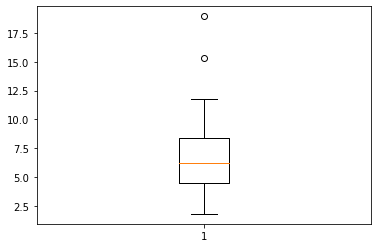

In [76]:
suzlon = yf.Ticker('suzlon.ns')
data = yf.download("suzlon.ns", start="2020-01-01", end="2024-04-30", interval="1mo")
# print(data)
data1 = data.drop(['Open','High','Low','Adj Close'],axis=1)
data1.rename(columns={'Close':'Price'},inplace=True)
# df = pd.DataFrame({'A':[1,1,2,1,2,1,2,1,2,1],
#                    'B':[1,22,23,24,25,26,27,28,29,50]})
data2 = remove_outlines(data1,'Price')
print(data2)
fig ,ax = plt.subplots()
ax.boxplot(data2['Price'])
plt.show()

In [3]:
data = yf.download("suzlon.ns", period="10sec")
print(data)

[*********************100%%**********************]  1 of 1 completed

                 Open       High   Low      Close  Adj Close    Volume
Date                                                                  
2024-04-30  41.950001  42.099998  41.0  41.599998  41.599998  30499261


In [5]:
df = pd.DataFrame({'A':[2,2,5,5,5,6],
                   'B':[2,2,5,7,0,11],
                   'C':['x','Y','A','B','C','J']})
print(df)
df1 = df.drop_duplicates(subset=['A','B'],keep='first')
print(df1)

   A   B  C
0  2   2  x
1  2   2  Y
2  5   5  A
3  5   5  B
4  5   0  C
5  6  11  J
   A   B  C
0  2   2  x
2  5   5  A
4  5   0  C
5  6  11  J
